## References

1. https://github.com/tesseract-ocr/tesseract/wiki/ImproveQuality#dictionaries-word-lists-and-patterns
2. https://stackoverflow.com/questions/9480013/image-processing-to-improve-tesseract-ocr-accuracy

1. Scaling to the right size
2. Increase contrast
3. Binarize image
4. remove noise and scanning artefacts (black border)
5. Deskew
6. Remove border

1. Image processing
2. Rescaling
3. Binarisation
4. Noise Removal
5. Rotation / Deskewing
6. Borders
7. Transparency / Alpha channel

In [ ]:
## Check 21 image

In [1]:
import re
import cv2
import glob
import imutils
import tempfile
import dateparser
import numpy as np
import pandas as pd
from PIL import Image
import pytesseract as pt
from datefinder import find_dates
from dateutil.parser import parse
from matplotlib import pyplot as plt
from dateparser.search import search_dates
from imutils.perspective import four_point_transform
pt.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [2]:
raw = pd.read_csv('image_data.csv')

In [3]:
img_str = pt.image_to_string("images/15.jpeg")

In [4]:
print(img_str)

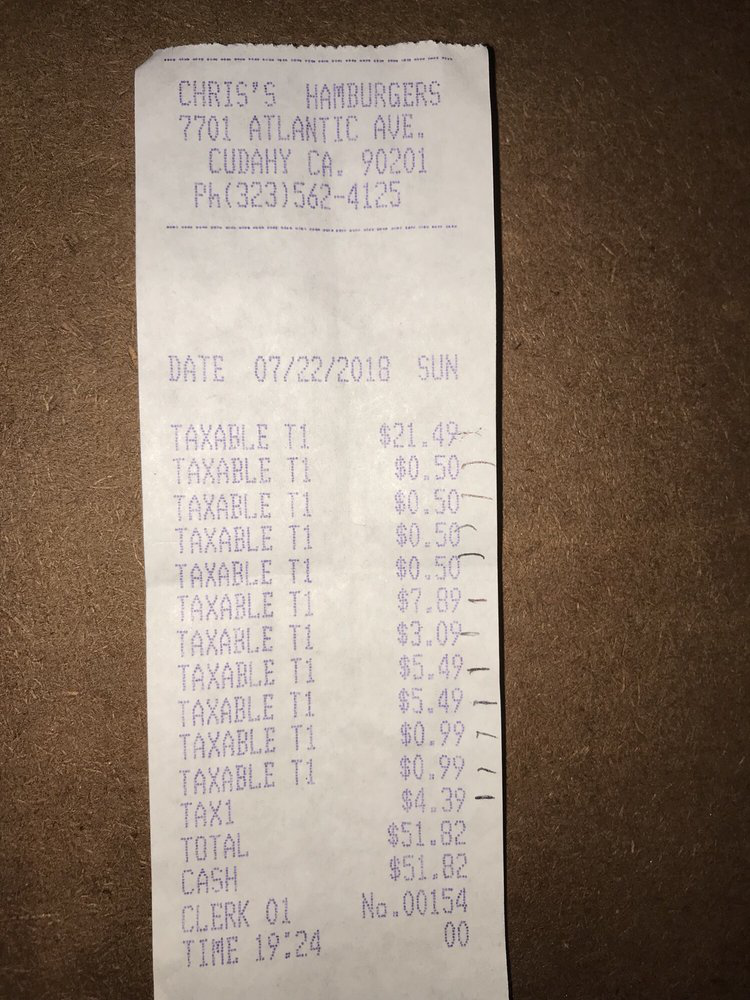

In [5]:
Image.open('images/15.jpeg')

In [ ]:
img = cv.imread('images/4.jpeg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# load the image in GRAYSCALE and apply Gaussian Blur
img = cv.imread('images/4.jpeg',0)
#blr = cv.GaussianBlur(img,(5,5),0)
#Image.fromarray(img)
img.shape  #, blr.shape

In [ ]:
edge = cv.Canny(blr, 75, 200)
Image.fromarray(blr)

In [ ]:
# Scaling the Image size
img = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)
Image.fromarray(img)
#img.shape

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)

In [ ]:
img = cv2.imread('images/15.jpeg')
print(img.shape)
img_str = pt.image_to_string(Image.fromarray(img))

In [ ]:
# Rescale the image, if needed.
#img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  Enlarge the image
#img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA) Shrinking 
# img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)  Trade off

# Blurring image
#img = cv.blur(img,(5,5)) Average blurr
#img = cv2.GaussianBlur(img, (5, 5), 0) Gaussian blur
#img = cv2.medianBlur(img, 3) median blurr
#img = cv.bilateralFilter(img,9,75,75) keep edges sharpe

img_resize = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
img_resize.shape

In [ ]:
# Convert to gray
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply dilation and erosion to remove some noise
kernel = np.ones((1, 1), np.uint8)
img_dilate = cv2.dilate(img_grayscale, kernel, iterations=1)
img_erode = cv2.erode(img_dilate, kernel, iterations=1)

# Apply blur to smooth out the edges
img_gauss = cv2.GaussianBlur(img_erode, (5, 5), 0)

# Thresholding
#cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

In [ ]:
#Image.fromarray(img_gauss)
#Image.open('152.jpeg')
img_str = pt.image_to_string('152.jpeg')
print(img_str)

In [ ]:
img

In [20]:
raw.head()

,Unnamed: 0,actual,converted,predicted
0,1,"May 21, 2019",2019-05-21,NaN
1,2,25-07-19,2019-07-25,2019-07-25
2,3,"Sep 29, 2018",2018-09-29,NaN
3,4,Oct06' 16,2016-10-06,NaN
4,5,5/29/2019,2019-05-29,2019-05-29


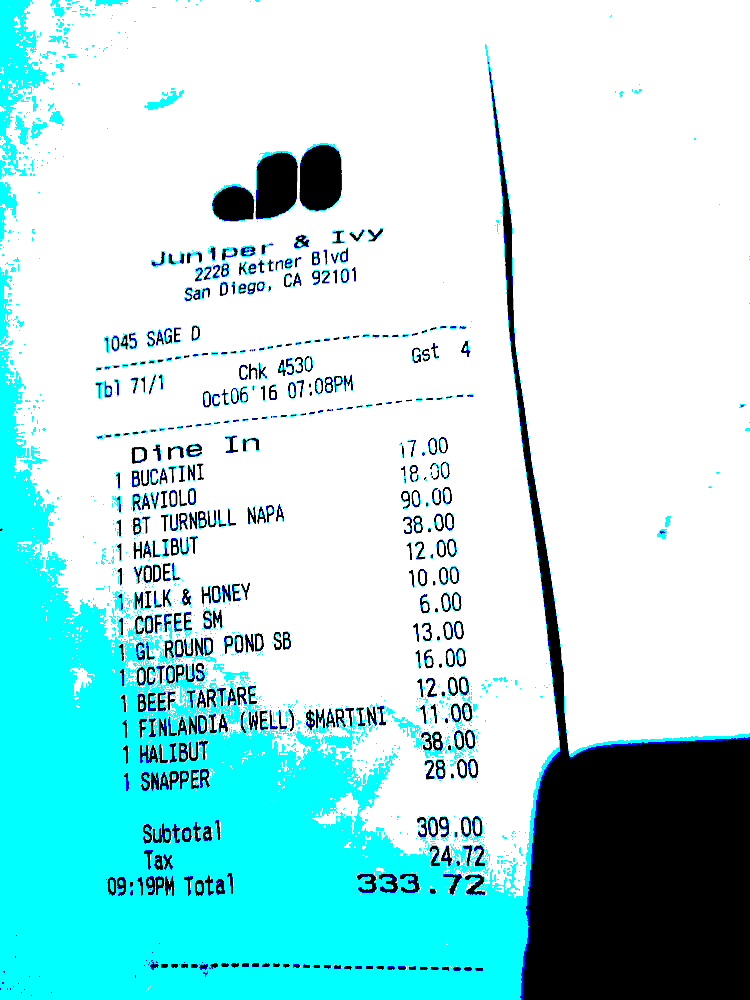

In [24]:
img = cv2.imread('images/4.jpeg')
img_thres = cv2.threshold(img,117,255,cv2.THRESH_BINARY)[1]
Image.fromarray(img_thres)
#img_str = pt.image_to_string(img_thres)

In [ ]:
# Apply threshold to get image with only b&w (binarization)
img_thres = cv2.threshold(img_gauss, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img.shape

In [ ]:
Image.fromarray(img_thres)

In [ ]:
## Set image DPI  (It reduce the size of image)
def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size 
    factor = min(1, float(1024.0 / length_x)) 
    size = int(factor * length_x), int(factor * width_y) 
    im_resized = im.resize(size, Image.ANTIALIAS)
    return im_resized

In [ ]:
new_img = set_image_dpi("images/13.jpeg")

In [ ]:
image = cv2.imread('images/1.jpeg')

In [ ]:
cv2.cvtColor(np.array(new_img.resize((500,500), Image.ANTIALIAS)), cv2.COLOR_BGR2GRAY)
cv2.resize()

In [ ]:
# 1. Detect the text block with skew in the image.

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 10, 50)
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

screenCnt = None
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break
        
img_drawcnt = cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

In [ ]:
Image.fromarray(img_drawcnt)

In [ ]:
# 2. Now calculate the angle of rotation.
# 3. Rotating the image to correct the skew.
raw.head()

In [ ]:
img_str = pt.image_to_string('new.png')

In [ ]:
#Image.open('images/13.jpeg') # 250,250
image = cv2.imread("images/13.jpeg")

In [ ]:
image = img_drawcnt

In [ ]:
## Detecting skewness and rotate image

#image = cv2.imread("images/46.jpeg")

# convert the image to grayscale and flip the foreground
# and background to ensure foreground is now "white" and
# the background is "black"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
 
# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Finding minimum rotated bouding region
# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
 
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)

# otherwise, just take the inverse of the angle to make
# it positive
else:
    angle = -angle
    
# rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# draw the correction angle on the image so we can validate it
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
cv2.imshow("Input", image)
cv2.imshow("Rotated", rotated)
cv2.waitKey(0)

In [61]:
def rectify(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew


In [ ]:
img_str = pt.image_to_string(Image.open('images/31.jpeg'))
print(img_str)

## This combination works
1. Rescalling with 2 factor
2. Change to grayscale
3. Either we do binarize then remove noise / remove noise

In [58]:
gaussian_filter = (3,3)
img = cv2.imread('images/4.jpeg') # 450,338,3
image = cv2.resize(img, None, fx = 2, fy = 2, interpolation=cv2.INTER_CUBIC) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, gaussian_filter, 0)


In [59]:
img_str = pt.image_to_string(Image.fromarray(blurred))
print(img_str)

IvY
Ju ie K Rett Blvd
San Die 92 2101
1045 SAGE 0 a
a chk 4530 gst 4
ro Y e0eLpe 16 07:08PM
D i ne I nm x
1 BUCATINI \7 00
1 RAVIOLO 18.90
1 BT TURNBULL NAPA 90 .00
1 HALIBUT 38 .00
1 YODEL 12.00
1 MILK & HONEY 10.00
1 COFFEE SM 6.00
1 GL ROUND POND SB 13.00
1 OCTOPUS 16.00
1 BEEF TARTAR 12.00
1 FINLANDIA WELL) $MARTINT 11.00
1 HALIBUT 38.00
1 SNAPPER
Subtotal
Tax

09:19PM Total


In [28]:
# Types of filter to remove noise

#img_blur = cv.blur(img,(5,5)) Average blurr
#img      = cv2.GaussianBlur(img, (5, 5), 0) Gaussian blur
#img      = cv2.medianBlur(img, 3) median blurr
#img   = cv2.bilateralFilter(gray,9,75,75) 
ret2,th4 = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,th1 = cv2.threshold(blurred,100,200,cv2.THRESH_BINARY)



In [57]:
img_str = pt.image_to_string('images/4.jpeg')
print(img_str)

i LvyY
“ jper

Jar 08 Kettner Blvd
gan Diego, cA 92101

1085 SABE eentennne e.

bin In

1 BUCATIN ! a
1 RAVIOLO 18.9
1 BT TURNBULL NAPA 90.00
1 HALIBUT 36.00
1 YODEL 12.00
1 MILK & HONEY 10.00
1 COFFEE SM 6.00
1 GL ROUND POND SB 13.00
1 OCTOPUS 16.00
1 BEEF TARTARE 42,00

{ FINLANDIA (WELL) MARTINI 11,00
4 HALIBUT 38.00

1 SNAPPER aa
acute) 309.00
aK

09:19PH Total 24.72

333.72


# seems threshold doesn't give good accracy on some images

In [ ]:
#search_dates("29-MAY -2019")


In [ ]:
Image.fromarray(blurred)

In [62]:
gaussian_filter = (3,3)
img = cv2.imread('images/4.jpeg') # 450,338,3
image = cv2.resize(img, None, fx = 2, fy = 2, interpolation=cv2.INTER_CUBIC) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, gaussian_filter, 0)

# creating copy of original image
orig = image.copy()

# convert to grayscale and blur to smooth
#blurred = cv2.medianBlur(gray, 5)

# apply Canny Edge Detection
edged = cv2.Canny(blurred, 0, 50)
orig_edged = edged.copy()

# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
(contours, _) = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

#x,y,w,h = cv2.boundingRect(contours[0])
#cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),0)

# get approximate contour
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * p, True)

    if len(approx) == 4:
        target = approx
        break


# mapping target points to 800x800 quadrilateral
approx = rectify(target)
pts2 = np.float32([[0,0],[800,0],[800,800],[0,800]])

M = cv2.getPerspectiveTransform(approx,pts2)
dst = cv2.warpPerspective(orig,M,(800,800))

cv2.drawContours(image, [target], -1, (0, 255, 0), 2)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)


# using thresholding on warped image to get scanned effect (If Required)
th2 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret2,th4 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,th1 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)


cv2.imshow("Original", orig)
cv2.imshow("Original Gray", gray)
cv2.imshow("Original Blurred", blurred)
cv2.imshow("Original Edged", orig_edged)
cv2.imshow("Outline", image)
cv2.imshow("Thresh Binary", th1)
cv2.imshow("Thresh mean", th2)
cv2.imshow("Thresh gauss", th3)
cv2.imshow("Otsu's", th4)
cv2.imshow("dst", dst)

# other thresholding methods
"""
ret,thresh1 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(dst,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(dst,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(dst,127,255,cv2.THRESH_TOZERO_INV)

cv2.imshow("Thresh Binary", thresh1)
cv2.imshow("Thresh Binary_INV", thresh2)
cv2.imshow("Thresh Trunch", thresh3)
cv2.imshow("Thresh TOZERO", thresh4)
cv2.imshow("Thresh TOZERO_INV", thresh5)
"""

cv2.waitKey(0)
#cv2.destroyAllWindows()


-1

## So, Ultimately we come to know that-
## 1. Rescaling the image to 2 factor
## 2. Convert it to grayscale color
## 3. Apply gaussain filter to remove noises

## After applying so many filters we came to know:
## 1. Contour doesn't works on few images it 
## 2. Threshold also doesn't works

## Now we check accuracy on first 100 images after applying these transformation

In [66]:
def finding_date(img_ar):
    img_str = pt.image_to_string(Image.fromarray(img_ar))
    newstr = list(set(map(lambda x : x.strip(), img_str.split('\n'))))
    tags = []
    for i in newstr:
        try:
            find_date = search_dates(i) 
        except:
            continue
        if find_date:
            for j in find_date:
                tags.append(j[0])

    pattern1 = r"(\d{1,4}([.'’\-/])\d{1,2}([.'’\-/])\d{1,4})"
    pattern2 = r"(\d{1,4}([.'’\-/\s])[ADFJMNOSadfjmnos]\w*([.'’\-/\s]*)\d{1,4})"
    pattern3 = r"([ADFJMNOSadfjmnos]\w*\s\d{1,4}([,'’.\-/\s]*)([.'’\-/\s])\d{1,4})"
    pattern4 = r"[ADFJMNOSadfjmnos]\w*\d{1,4}(['’]*)\d{1,4}"
    pattern5 = r"(\d{1,4}([.'’\-/\s])\d{1,4}"
    
    date_find = []

    for i in tags:
        for j in (re.search(regex,i) for regex in [pattern1, pattern2, pattern3, pattern4]):
            if j:
                s = j.group()
                if s.find('.'):
                    date_find.append("-".join(s.split('.')))
                else:
                    date_find.append(s)

    date_find = list(set(date_find))

    dates = {}
    for i in date_find:
        try:
            dates[i] = search_dates(i)[0][1].strftime("%Y-%m-%d")
        except:
            continue
    print(dates)
    if dates:
        #print(min(dates.values()))
        return min(dates.values())
    return None

In [56]:
finding_date('images/4.jpeg')

{}


In [67]:
def prepreprocess(path):
    gaussian_filter = (3,3)
    img = cv2.imread(path) 
    img = cv2.resize(img, None, fx = 2, fy = 2, interpolation=cv2.INTER_CUBIC) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, gaussian_filter, 0)
    return img

In [ ]:
img = prepreprocess('images/1.jpeg')

In [36]:
raw.columns = ['images', 'actual', 'converted', 'predicted']

In [68]:
raw['predicted_2'] = None

In [69]:
raw.head()

,images,actual,converted,predicted,predicted_2
0,1,"May 21, 2019",2019-05-21,NaN,None
1,2,25-07-19,2019-07-25,2019-07-25,None
2,3,"Sep 29, 2018",2018-09-29,NaN,None
3,4,Oct06' 16,2016-10-06,NaN,None
4,5,5/29/2019,2019-05-29,2019-05-29,None


In [51]:
# these are the images which either dont have dates or not readable by human eye
raw.images[raw.actual.isna()].values  

array([ 7, 40, 44, 51, 53, 57, 58, 63, 65, 70, 78, 84, 87, 97],
      dtype=int64)

In [70]:
for i in raw.images:
    path = "images/" + str(i) + ".jpeg"
    print(i,end=' : ')
    img_arr  = prepreprocess(path)
    date = finding_date(img_arr)
    raw.loc[i,'predicted_2'] = date

1 : {}
2 : {'25/07/19': '2019-07-25'}
3 : {'Sep 29, 2018': '2018-09-29'}
4 : {}
5 : {'5/29/2019': '2019-05-29'}
6 : {'03/Jul/2019': '2019-07-03'}
7 : {}
8 : {}
9 : {}
10 : {'22/05/19': '2019-05-22'}
11 : {'07/17/2019': '2019-07-17'}
12 : {'07/02/2019': '2019-07-02'}
13 : {}
14 : {}
15 : {}
16 : {}
17 : {'5/24/2019': '2019-05-24'}
18 : {'4/15/16': '2016-04-15'}
19 : {}
20 : {'6/20/2019': '2019-06-20'}
21 : {'29-MAY -2019': '2019-05-29'}
22 : {}
23 : {'05/07/2019': '2019-05-07'}
24 : {'18/06/2015': '2015-06-18'}
25 : {'28-Jun-2019': '2019-06-28'}
26 : {'09/08/04': '2004-09-08', '03/Jun/2019': '2019-06-03'}
27 : {}
28 : {'04/13/2019': '2019-04-13', '07/12/2019': '2019-07-12', '04/13/19': '2019-04-13'}
29 : {'07-Jun-2019': '2019-06-07'}
30 : {'6/28/2019': '2019-06-28'}
31 : {'30-04-2019': '2019-04-30'}
32 : {'ST 6-40': '2040-06-23', 'Sit 25-07': '2019-07-25', '25-07-19': '2019-07-25'}
33 : {}
34 : {'06/08/2019': '2019-06-08'}
35 : {'14/07/2019': '2019-07-14'}
36 : {'30-Jun-2018': '2018-06-

In [174]:
gaussian_filter = (5,5)
img = cv2.imread(path) 
image = cv2.resize(img, None, fx = 2, fy = 2, interpolation=cv2.INTER_CUBIC) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, gaussian_filter, 0)

img_str = pt.image_to_string(Image.fromarray(blurred))
print(img_str)

eth
Crista

 
       

30201
"Type:  PuW
LARGE comBO 9.48
Spicy Chicken
Only
ADD per ican Ch 5 =.
atta eese 0.5 *
Large Files
CMB LG FREESTYLE
Coke
\ Total Items 3 9.98
| Tax 0.70
PUW Total 10.68
Mastercard #XXXXXXXXXXXX1333 $10.68

Auth:08073B
Site #: 7781 Term #: 4


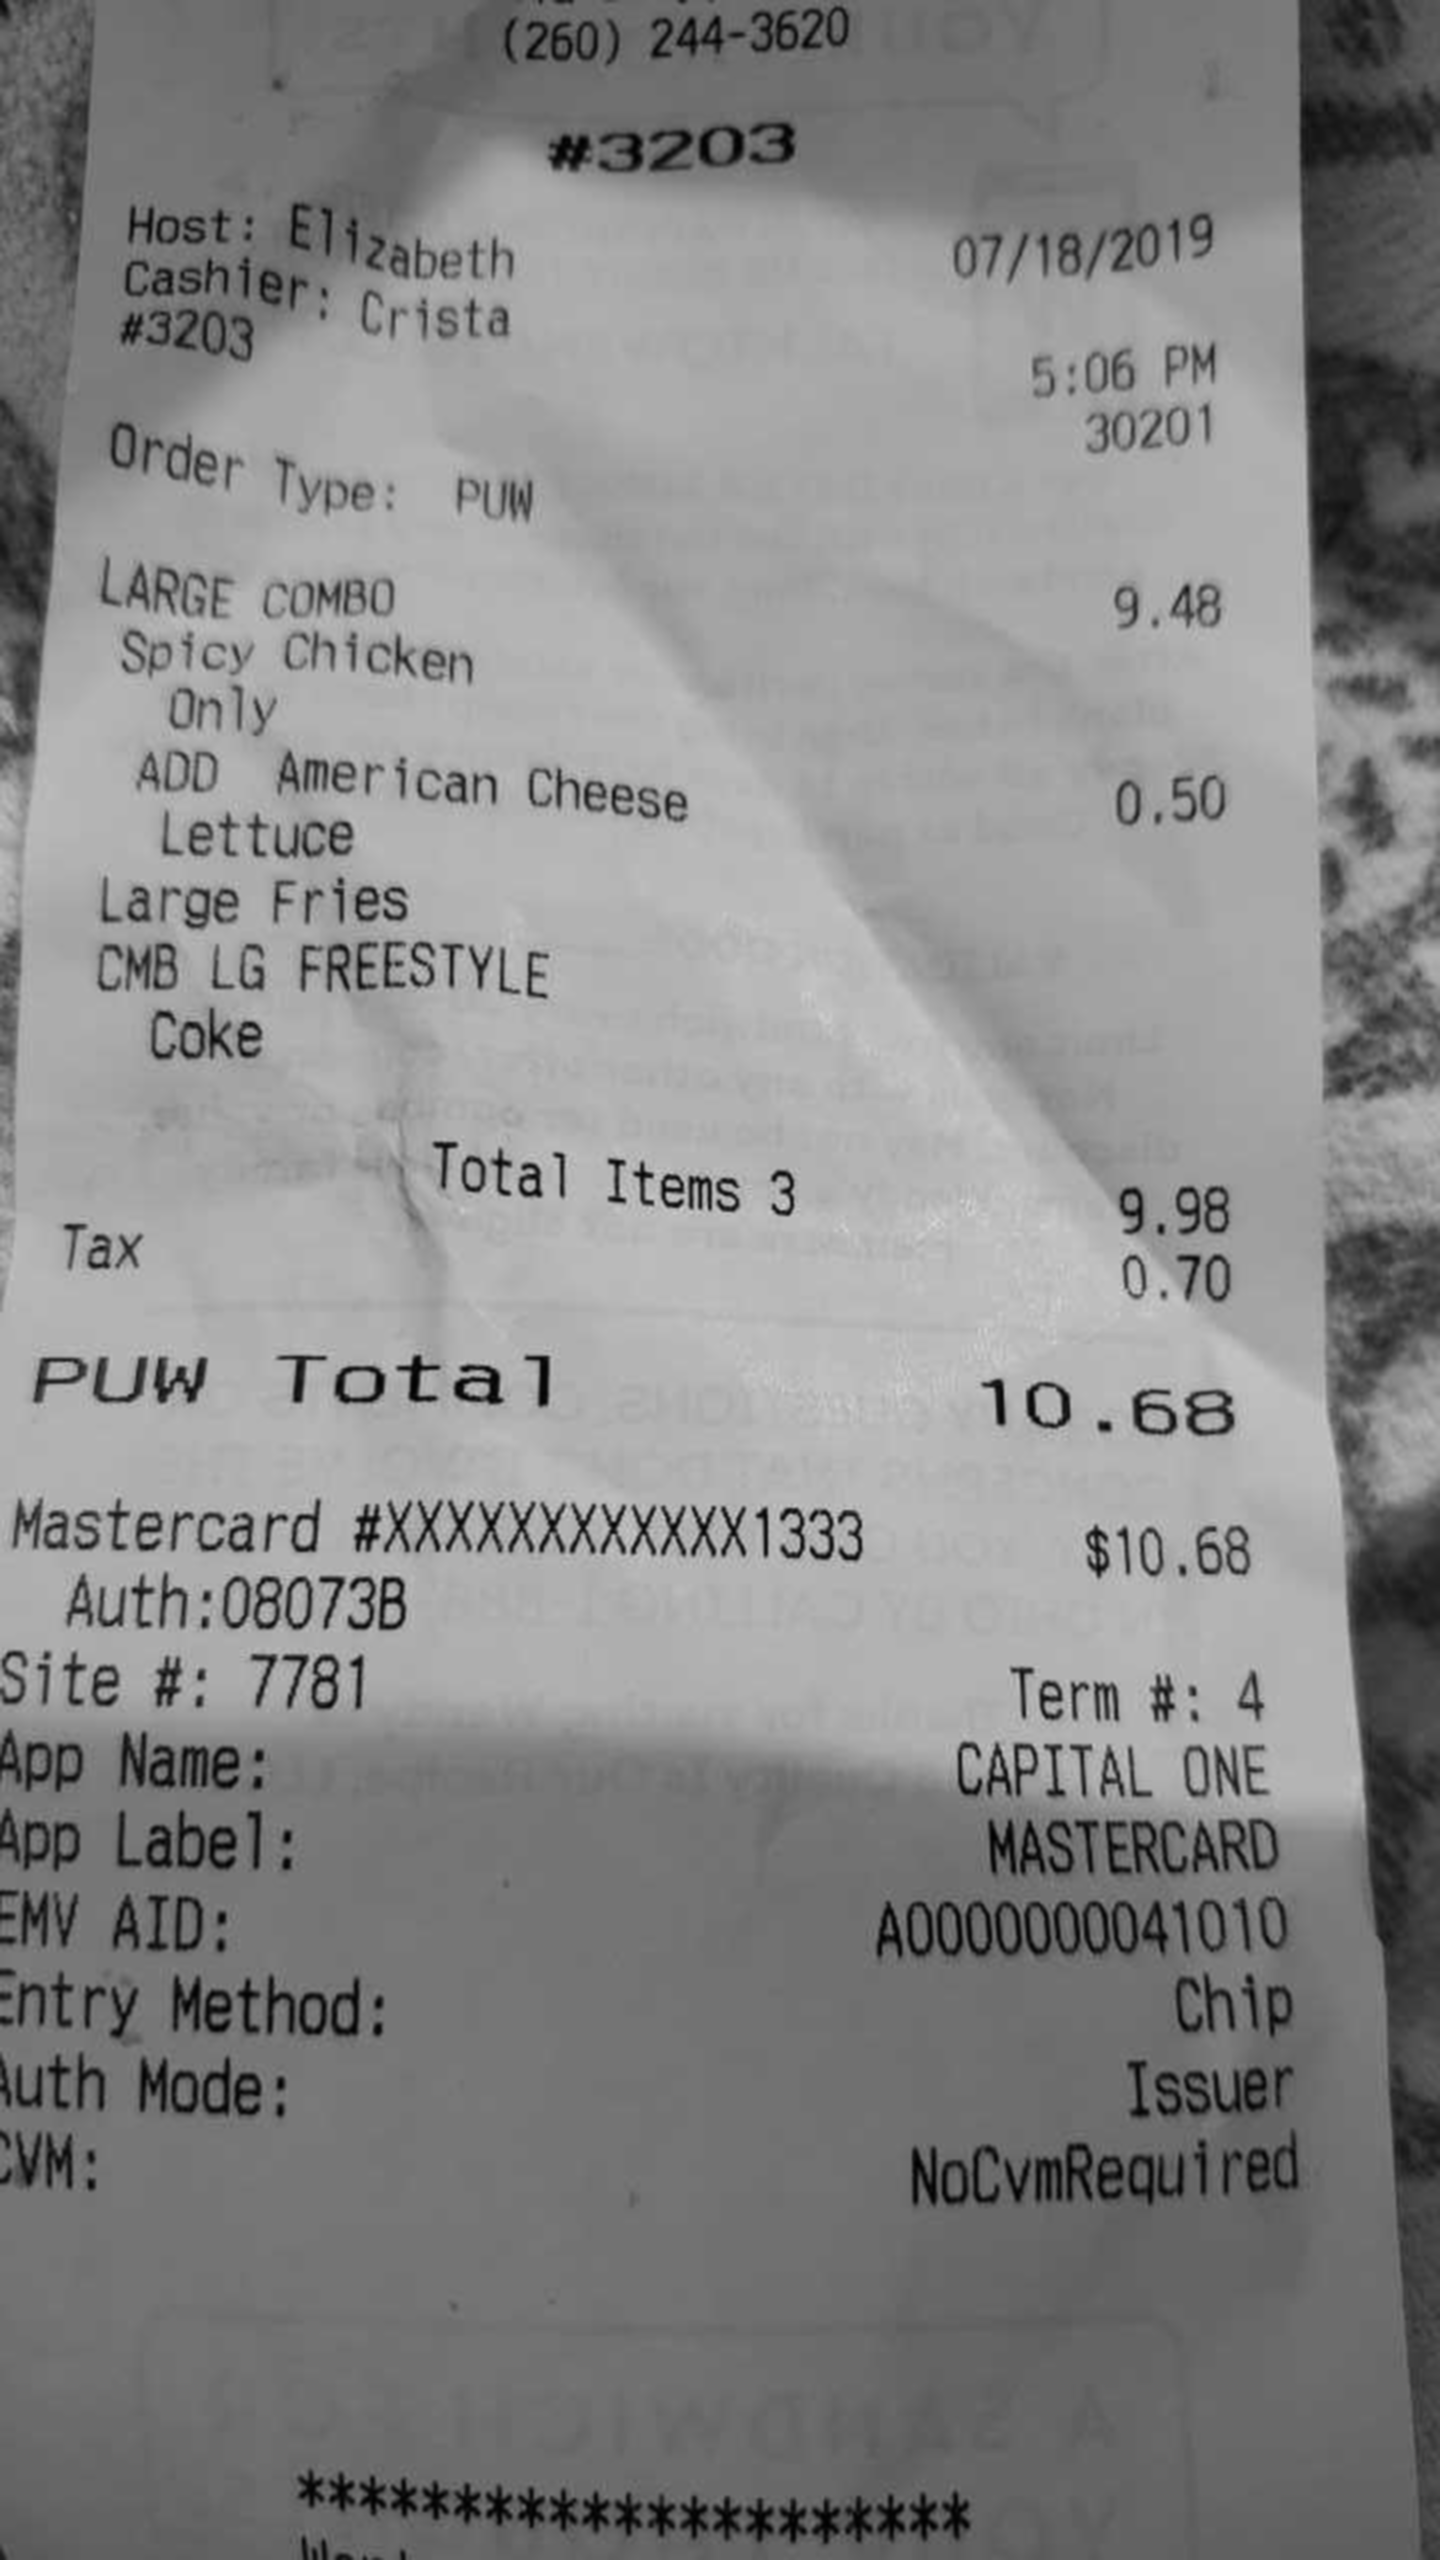

In [175]:
Image.fromarray(blurred)

In [176]:
ret2,th4 = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,th1 = cv2.threshold(blurred,127,255,cv2.THRESH_BINARY)
cv2.imshow('th1',th1)
cv2.imshow('th4',th4)

In [172]:
path = "images/100.jpeg"
img_str = pt.image_to_string(path, lang='eng')
print(img_str)

eth
Crista

    
       

30201
Type: puW
LARGE como 9.48
Spicy Chicken
Only
ADD Aner ican Cheese 0,50
Lettuce 4
Large ries ax
[MB LG FREESTYLE ee
oe X &
“Total ttens 3 “9.98
~ Jax 0.70
PUW Total 10.68 §
Mastercard #XXXXXXXXXXXX1333 $10.68

Auth 080738
Site #: 7781


In [95]:
new_raw = raw[raw.actual.notnull()]

In [171]:
#new_raw.converted
#new_raw.loc['predicted_2'] = new_raw.loc['predicted_2'][1:]
#new_raw#.loc['predicted_3'] = 
#new_raw['predicted_3'] = ns[1:].values
#new_raw.drop(['predicted','predicted_2'],axis=1,inplace=True)
#new_raw.predicted_3 == new_raw.converted).value_counts()


In [119]:
#(new_raw.predicted_2 == new_raw.converted).value_counts()
new_raw.tail()

,images,actual,converted,predicted,predicted_2
95,96.0,15-06-19,2019-06-15,2019-06-15,2019-07-02
97,98.0,02-Jul-19,2019-07-02,2019-07-02,None
98,99.0,12-02-17,2017-12-02,2010-12-02,2019-07-02
99,100.0,07/18/2019,2019-07-18,NaN,2017-12-02
predicted_2,NaN,NaN,NaN,NaN,NaN
